In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
accepted = pd.read_csv('accepted.csv')
accepted.shape

C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)

In [3]:
pd.set_option('display.max_columns', None)
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
(accepted.isnull().sum(axis = 0) / accepted.shape[0] * 100.00).sort_values(ascending = False).head(50)

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_end_date                              99.517097
hardship_start_date                            99.517097
hardship_type                                  99.517097
hardship_reason                                99.517097
hardship_status                                99.517097
deferral_term                                  99.517097
hardship_last_payment_amount                   99.517097
hardship_payoff_balance_amount                 99.517097
hardship_loan_status                           99.517097
hardship_dpd                                   99.517097
hardship_length                                99.517097
payment_plan_start_date                        99.517097
hardship_amount                                99.517097
settlement_term                                98.485160
debt_settlement_flag_date                      98.485160
settlement_status              

In [5]:
# drop features with more than 80% missing values
loan = accepted.drop(['member_id', 'orig_projected_additional_accrued_interest', 'hardship_loan_status', 'hardship_dpd', 
                     'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 
                      'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_type', 
                     'hardship_payoff_balance_amount', 'settlement_percentage', 'debt_settlement_flag_date', 
                      'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_term', 
                      'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'revol_bal_joint', 
                      'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_open_acc', 
                     'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 
                     'sec_app_fico_range_low', 'sec_app_collections_12_mths_ex_med', 'verification_status_joint', 
                     'dti_joint', 'annual_inc_joint', 'desc', 'mths_since_last_record', 'hardship_last_payment_amount'], 
                     axis = 1)
loan.shape

(2260701, 112)

In [6]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,Mar-2019,704.0,700.0,0.0,NaN,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,

In [7]:
loans = loan.drop(['id', 'zip_code', 'addr_state', 'funded_amnt', 'funded_amnt_inv', 'url'], axis = 1)
loans.shape

(2260701, 106)

In [8]:
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,Business,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,NaN,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,Mar-2019,704.0,700.0,0.0,NaN,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,Mar-2019,679.0,675.0,0.0,NaN,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.

In [9]:
# check rows with missing value
(loans.isnull().sum(axis = 1) / 106 * 100.00).sort_values(ascending = False).head(20)

2260700    100.0
1352690    100.0
1751196    100.0
1654416    100.0
1654415    100.0
1651665    100.0
421095     100.0
421096     100.0
1611878    100.0
1611877    100.0
1481104    100.0
1481103    100.0
1352689    100.0
651664     100.0
528961     100.0
528962     100.0
1117059    100.0
1117058    100.0
983170     100.0
983169     100.0
dtype: float64

In [10]:
# Drop rows with more than 80% missing values
perc = 80.0 
min_count =  int(((100-perc)/100)*loans.shape[1] + 1)
loans = loans.dropna(axis=0, thresh=min_count)
loans.shape

(2260668, 106)

In [11]:
# Check missing value again of each column
(loans.isnull().sum(axis = 0) / loans.shape[0] * 100.00).sort_values(ascending = False).head(50)

mths_since_recent_bc_dlq          77.011175
mths_since_last_major_derog       74.309585
mths_since_recent_revol_delinq    67.250432
next_pymnt_d                      59.509402
mths_since_last_delinq            51.246003
il_util                           47.280273
mths_since_rcnt_il                40.250227
all_util                          38.322655
open_acc_6m                       38.313012
inq_last_12m                      38.313012
total_cu_tl                       38.313012
open_rv_24m                       38.312968
open_act_il                       38.312968
open_il_24m                       38.312968
total_bal_il                      38.312968
open_rv_12m                       38.312968
open_il_12m                       38.312968
inq_fi                            38.312968
max_bal_bc                        38.312968
mths_since_recent_inq             13.068482
emp_title                          7.385826
num_tl_120dpd_2m                   6.796973
emp_length                      

In [12]:
# For categorical features: fill in mode
# For numerical features: fill in median
null_mode = ['emp_length', 'title', 'next_pymnt_d', 'emp_title', 'last_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

null_median = ['mths_since_recent_inq', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct', 'bc_util', 'percent_bc_gt_75', 
              'bc_open_to_buy', 'mths_since_recent_bc', 'pct_tl_nvr_dlq', 'num_rev_accts', 'mo_sin_old_rev_tl_op', 
              'mo_sin_rcnt_rev_tl_op', 'num_actv_bc_tl', 'num_accts_ever_120_pd', 'total_rev_hi_lim', 'num_bc_tl', 
              'tot_cur_bal', 'tot_coll_amt', 'num_actv_rev_tl', 'mo_sin_rcnt_tl', 'tot_hi_cred_lim', 'num_op_rev_tl', 
              'num_rev_tl_bal_gt_0', 'num_tl_30dpd', 'total_il_high_credit_limit', 'num_tl_90g_dpd_24m', 
              'num_tl_op_past_12m', 'num_il_tl', 'num_bc_sats', 'num_sats', 'total_bc_limit', 'acc_open_past_24mths', 
              'total_bal_ex_mort', 'mort_acc', 'revol_util', 'dti', 'pub_rec_bankruptcies', 'collections_12_mths_ex_med', 
              'chargeoff_within_12_mths', 'inq_last_6mths', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 
              'mths_since_recent_revol_delinq', 'mths_since_last_delinq', 'il_util', 'mths_since_rcnt_il', 'all_util', 
              'open_acc_6m', 'inq_last_12m', 'total_cu_tl', 'open_rv_24m', 'inq_fi', 'max_bal_bc', 'open_act_il', 
              'open_rv_12m', 'open_il_24m', 'open_il_12m', 'total_bal_il', 'avg_cur_bal', 'tax_liens', 'total_acc', 
              'acc_now_delinq', 'pub_rec', 'open_acc', 'delinq_amnt', 'delinq_2yrs', 'annual_inc']

for feature in null_mode:
    loans[feature] = loans[feature].fillna(loans[feature].mode().iloc[0])

for feature in null_median:
    loans[feature] = loans[feature].fillna(loans[feature].median())

In [13]:
# Create a column with issue year only without month
loans['issue_year'] = loans['issue_d'].str[-4:]
loans['issue_year'] = loans['issue_year'].astype(int)
#loans = loans.drop(['issue_d'], axis = 1)
loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_year
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Apr-2019,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,2015
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,Business,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Apr-2019,Mar-2019,699.0,695.0,0.0,44.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,37.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,2015
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,Debt consolidation,10.78,0.0,Aug-2000,695.0,699.0,0.0,31.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Apr-2019,Mar-2019,704.0,700.0,0.0,44.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,37.0,10.0,33.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,2015
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,17.06,0.0,Sep-2008,785.0,789.0,0.0,31.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,Mar-2019,679.0,675.0,0.0,44.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,37.0,5.0,33.0,0.0,4.0,5.

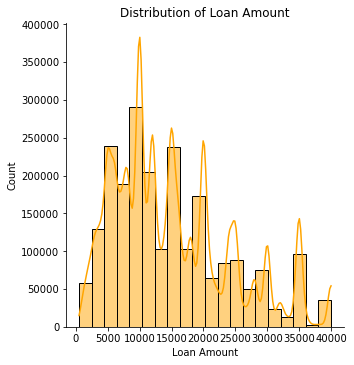

In [23]:
sns.displot(loans, x="loan_amnt", kde = True, bins=20, color = 'orange').set(title = 'Distribution of Loan Amount',
                                                                            xlabel = 'Loan Amount')

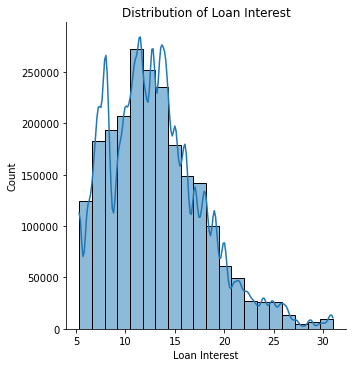

In [25]:
sns.displot(loans, x="int_rate", kde = True, bins=20).set(title = 'Distribution of Loan Interest', 
                                                         xlabel = 'Loan Interest')

In [27]:
amount_and_int = loans[['int_rate', 'loan_amnt']]
amount_and_int.describe()

,int_rate,loan_amnt
count,2.260668e+06,2.260668e+06
mean,1.309283e+01,1.504693e+04
std,4.832138e+00,9.190245e+03
min,5.310000e+00,5.000000e+02
25%,9.490000e+00,8.000000e+03
50%,1.262000e+01,1.290000e+04
75%,1.599000e+01,2.000000e+04
max,3.099000e+01,4.000000e+04


In [14]:
# Get average interest rate of loans by grade
interest_group = loans.groupby(['grade'])['int_rate'].mean()
interest_group = pd.DataFrame(interest_group)
interest_group['grade'] = interest_group.index
interest_group.rename(columns={'int_rate':'ave_int_rate'}, inplace=True)
interest_group.reset_index(inplace = True, drop = True)
interest_group

,ave_int_rate,grade
0,7.084545,A
1,10.675806,B
2,14.143689,C
3,18.143067,D
4,21.829653,E
5,25.454091,F
6,28.074255,G


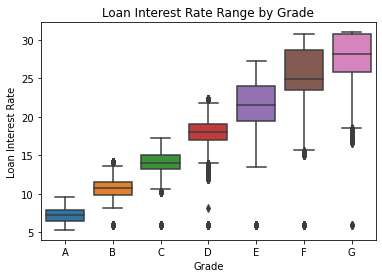

In [15]:
grade_int = loans[['grade', 'int_rate']]
grade_int = grade_int.sort_values('grade', ascending = True)
sns.boxplot(x='grade', y="int_rate", data=grade_int).set(title = 'Loan Interest Rate Range by Grade', xlabel = 'Grade', 
                                                          ylabel = 'Loan Interest Rate')
fig = plt.gcf()

In [16]:
grade_int.groupby(['grade'])['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,433027.0,7.084545,0.984465,5.31,6.46,7.24,7.89,9.63
B,663557.0,10.675806,1.238302,6.00,9.88,10.75,11.49,14.09
C,650053.0,14.143689,1.251283,6.00,13.22,13.99,15.02,17.27
D,324424.0,18.143067,1.676964,6.00,16.99,17.99,19.03,22.35
E,135639.0,21.829653,2.703925,6.00,19.52,21.48,23.99,27.27
F,41800.0,25.454091,2.928144,6.00,23.43,24.89,28.69,30.75
G,12168.0,28.074255,2.804587,6.00,25.89,28.18,30.79,30.99


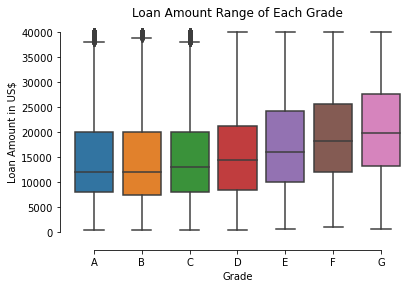

In [18]:
# Get amount of loans by grade
grade_amount = loans[['grade', 'loan_amnt']]
grade_amount = grade_amount.sort_values('grade', ascending = True)
sns.boxplot(x="grade", y="loan_amnt", data=grade_amount).set(title = 'Loan Amount Range of Each Grade', xlabel = 'Grade', 
                                                                     ylabel = 'Loan Amount in US$')
sns.despine(offset=10, trim=True)
fig = plt.gcf()

In [19]:
grade_amount.groupby(['grade'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,433027.0,14603.343210,9107.975657,500.0,8000.00,12000.0,20000.00,40000.0
B,663557.0,14173.338199,8957.012601,500.0,7400.00,12000.0,20000.00,40000.0
C,650053.0,15038.083318,9203.950054,500.0,8000.00,13000.0,20000.00,40000.0
D,324424.0,15711.983007,9250.612823,500.0,8575.00,14400.0,21200.00,40000.0
E,135639.0,17453.078392,9363.276694,600.0,10000.00,16000.0,24175.00,40000.0
F,41800.0,19124.646531,9166.366254,1000.0,12000.00,18175.0,25600.00,40000.0
G,12168.0,20383.988741,8994.472986,600.0,13193.75,19800.0,27656.25,40000.0


In [20]:
amount_grade = loans.groupby(['grade'])['loan_amnt'].sum()
amount_grade = pd.DataFrame(amount_grade)
amount_grade['grade'] = amount_grade.index
#amount_grade.rename(columns={'int_rate':'ave_int_rate'}, inplace=True)
amount_grade.reset_index(inplace = True, drop = True)
amount_grade

,loan_amnt,grade
0,6.323642e+09,A
1,9.404818e+09,B
2,9.775551e+09,C
3,5.097344e+09,D
4,2.367318e+09,E
5,7.994102e+08,F
6,2.480324e+08,G


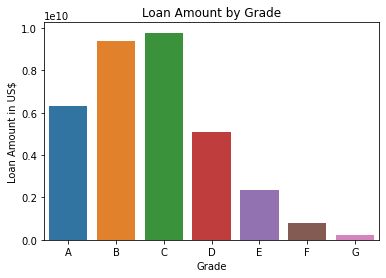

In [21]:
sns.barplot(data = amount_grade, x = 'grade', y = 'loan_amnt').set(title = 'Loan Amount by Grade', xlabel = 'Grade', 
                                                                    ylabel = 'Loan Amount in US$')
fig = plt.gcf()

[Text(0.5, 1.0, 'Number of Loans Issued by Grade'),
 Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Number of Loans')]

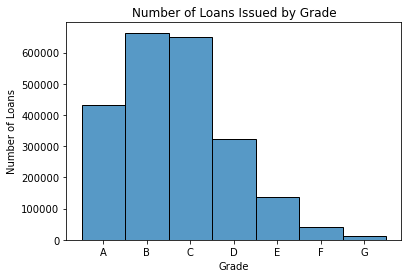

In [19]:
sns.histplot(data=grade_amount, x='grade').set(title = 'Number of Loans Issued by Grade', 
                                                                       xlabel = 'Grade', ylabel = 'Number of Loans')


In [22]:
# Get loan amount by year
year_amount = loans.groupby(['issue_year'])['loan_amnt'].sum()
year_amount = pd.DataFrame(year_amount)
year_amount['issue_year'] = year_amount.index
year_amount.reset_index(inplace = True, drop = True)
year_amount = year_amount.sort_values('issue_year', ascending = True)
year_amount


,loan_amnt,issue_year
0,4.977475e+06,2007
1,2.111925e+07,2008
2,5.192825e+07,2009
3,1.319926e+08,2010
4,2.616838e+08,2011
5,7.184110e+08,2012
6,1.982765e+09,2013
7,3.503840e+09,2014
8,6.417608e+09,2015
9,6.400570e+09,2016


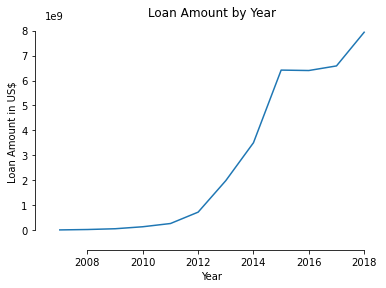

In [21]:
sns.lineplot(x='issue_year', y="loan_amnt", data=year_amount).set(title = 'Loan Amount by Year', xlabel = 'Year', 
                                                                ylabel = 'Loan Amount in US$')
sns.despine(offset=10, trim=True)
fig = plt.gcf()

In [27]:
year_grade = loans.groupby(['issue_year', 'grade'])['loan_amnt'].sum()
year_grade = pd.DataFrame(year_grade)
year_grade['info'] = year_grade.index.to_numpy()
year_grade['year'] = year_grade['info'].str[0]
year_grade['grade'] = year_grade['info'].str[1]
year_grade.reset_index(inplace = True, drop = True)
year_grade = year_grade.drop(['info'], axis = 1)
year_grade

,loan_amnt,year,grade
0,3.912000e+05,2007,A
1,8.171000e+05,2007,B
2,1.166875e+06,2007,C
3,7.925500e+05,2007,D
4,8.138250e+05,2007,E
...,...,...,...
79,2.052179e+09,2018,C
80,1.098233e+09,2018,D
81,2.901628e+08,2018,E
82,6.041202e+07,2018,F


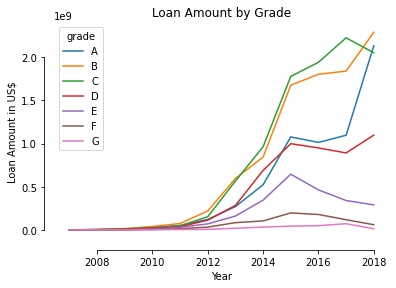

In [28]:
sns.lineplot(x='year', y="loan_amnt", hue = 'grade', data=year_grade).set(title = 'Loan Amount by Grade', xlabel = 'Year', 
                                                                ylabel = 'Loan Amount in US$')
sns.despine(offset=10, trim=True)
fig = plt.gcf()

In [29]:
term_interest = loans.groupby(['term'])['int_rate'].mean()
term_interest = pd.DataFrame(term_interest)
term_interest['term'] = term_interest.index
term_interest.reset_index(inplace = True, drop = True)
term_interest

,int_rate,term
0,11.947973,36 months
1,15.924135,60 months


In [30]:
term_amount = loans.groupby(['term'])['loan_amnt'].sum()
term_amount = pd.DataFrame(term_amount)
term_amount['term'] = term_amount.index
term_amount.reset_index(inplace = True, drop = True)
term_amount

,loan_amnt,term
0,2.051716e+10,36 months
1,1.349895e+10,60 months


Text(0.5, 1.0, 'Percentage of Loan Amount by Term')

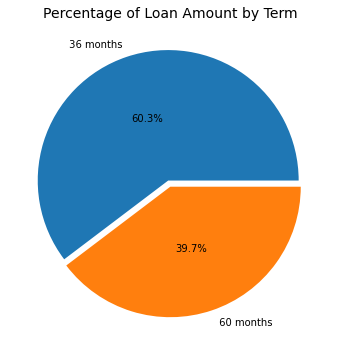

In [31]:
pie, ax = plt.subplots(figsize=[10,6])
labels = term_amount['term']
plt.pie(x=term_amount['loan_amnt'], autopct="%.1f%%", labels=labels, explode = [0.05, 0], pctdistance=0.5)
plt.title('Percentage of Loan Amount by Term', fontsize=14)

In [32]:
term_amount_grade = loans.groupby(['grade', 'term'])['loan_amnt'].sum()
term_amount_grade = pd.DataFrame(term_amount_grade)
term_amount_grade['info'] = term_amount_grade.index.to_numpy()
term_amount_grade['grade'] = term_amount_grade['info'].str[0]
term_amount_grade['term'] = term_amount_grade['info'].str[1]
term_amount_grade.reset_index(inplace = True, drop = True)
term_amount_grade = term_amount_grade.drop(['info'], axis = 1)
term_amount_grade

,loan_amnt,grade,term
0,5.798611e+09,A,36 months
1,5.250308e+08,A,60 months
2,6.628285e+09,B,36 months
3,2.776533e+09,B,60 months
4,5.074191e+09,C,36 months
5,4.701360e+09,C,60 months
6,2.272267e+09,D,36 months
7,2.825077e+09,D,60 months
8,6.155988e+08,E,36 months
9,1.751719e+09,E,60 months


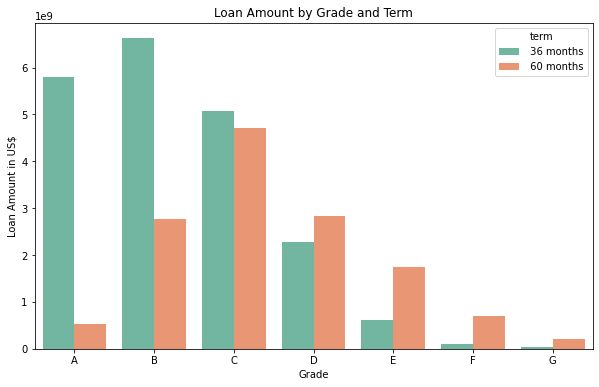

In [26]:
sns.barplot(x = 'grade', y = 'loan_amnt', hue = 'term', data = term_amount_grade, palette='Set2').set(
            title = 'Loan Amount by Grade and Term', xlabel = 'Grade', ylabel = 'Loan Amount in US$')
fig = plt.gcf()
fig.set_size_inches(10, 6)

In [27]:
loans['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [33]:
loans['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid', 
                              'Does not meet the credit policy. Status:Charged Off': 'Charged Off'}, inplace=True)

In [34]:
status = loans['loan_status'].value_counts()
status = pd.DataFrame(status)
status = status.rename(columns={'loan_status':'#_of_loans'})
status['loan_status'] = status.index
status.reset_index(inplace = True, drop = True)
status

,#_of_loans,loan_status
0,1078739,Fully Paid
1,878317,Current
2,269320,Charged Off
3,21467,Late (31-120 days)
4,8436,In Grace Period
5,4349,Late (16-30 days)
6,40,Default


Text(0.5, 1.0, 'Number of Loans by Status')

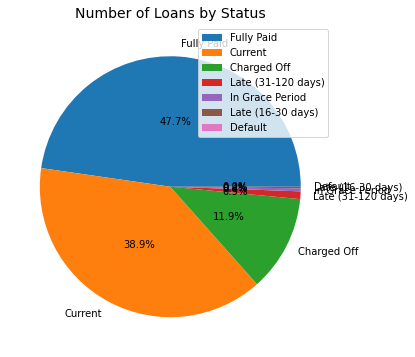

In [45]:
pie, ax = plt.subplots(figsize=[10,6])
label = status['loan_status']
plt.pie(x = status['#_of_loans'], autopct="%.1f%%", labels=label, pctdistance=0.5)
plt.legend(label)
plt.title('Number of Loans by Status', fontsize=14)

In [46]:
loans['loan_status'].replace({'Charged Off' : 'Default'}, inplace=True)

In [47]:
status2 = loans['loan_status'].value_counts()
status2 = pd.DataFrame(status2)
status2 = status2.rename(columns={'loan_status':'#_of_loans'})
status2['loan_status'] = status2.index
status2.reset_index(inplace = True, drop = True)
status2 = status2.drop([1, 3, 4, 5])
status2

,#_of_loans,loan_status
0,1078739,Fully Paid
2,269360,Default


Text(0.5, 1.0, 'Number of Loans by Status')

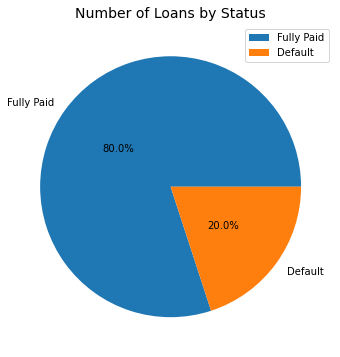

In [48]:
pie, ax = plt.subplots(figsize=[10,6])
label2 = status2['loan_status']
plt.pie(x = status2['#_of_loans'], autopct="%.1f%%", labels=label2, pctdistance=0.5)
plt.legend(label2)
plt.title('Number of Loans by Status', fontsize=14)

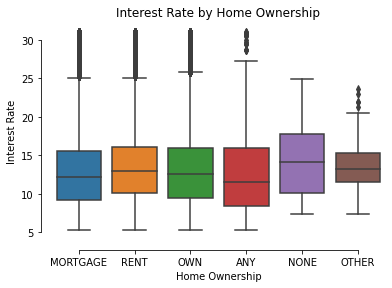

In [49]:
sns.boxplot(x='home_ownership', y="int_rate", data=loans).set(title = 'Interest Rate by Home Ownership', xlabel = 'Home Ownership', 
                                                                     ylabel = 'Interest Rate')
sns.despine(offset=10, trim=True)
fig = plt.gcf()

In [50]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [51]:
home_owner = loans[['home_ownership', 'int_rate', 'loan_amnt']]
home_owner['home_ownership_code'] = ord_enc.fit_transform(home_owner[['home_ownership']])
home_owner.head()

C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,home_ownership,int_rate,loan_amnt,home_ownership_code
0,MORTGAGE,13.99,3600.0,1.0
1,MORTGAGE,11.99,24700.0,1.0
2,MORTGAGE,10.78,20000.0,1.0
3,MORTGAGE,14.85,35000.0,1.0
4,MORTGAGE,22.45,10400.0,1.0


C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Correlation Heatmap')

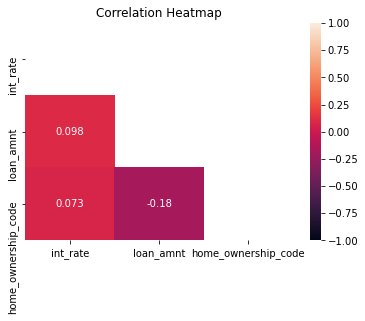

In [58]:
mask1 = np.triu(np.ones_like(home_owner.corr(), dtype=np.bool))
heatmap1 = sns.heatmap(home_owner.corr(), mask=mask1, vmin=-1, vmax=1, annot=True)
heatmap1.set_title('Correlation Heatmap')

In [55]:
purpose = loans.groupby(['purpose'])['loan_amnt'].sum()
purpose = pd.DataFrame(purpose)
purpose['purpose'] = purpose.index
purpose = purpose.sort_values('loan_amnt', ascending = False)
purpose.reset_index(inplace = True, drop = True)
purpose

,loan_amnt,purpose
0,2.040347e+10,debt_consolidation
1,7.919856e+09,credit_card
2,2.206625e+09,home_improvement
3,1.461483e+09,other
4,6.397652e+08,major_purchase
5,4.059537e+08,small_business
6,2.604266e+08,medical
7,2.255714e+08,car
8,2.219906e+08,house
9,1.292437e+08,moving


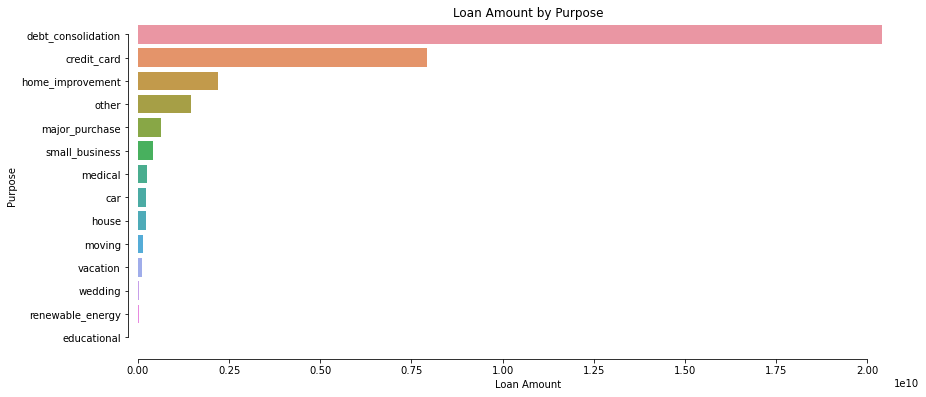

In [56]:
sns.barplot(x = 'loan_amnt', y = 'purpose', data = purpose).set(title = 'Loan Amount by Purpose', xlabel = 'Loan Amount', 
                                                          ylabel = 'Purpose')
sns.despine(offset=10, trim=True)
fig = plt.gcf()
fig.set_size_inches(14, 6)

C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Correlation Heatmap')

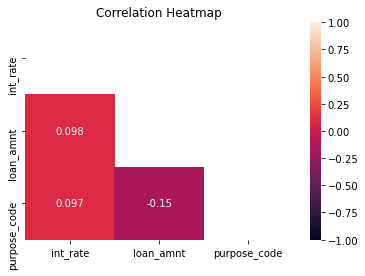

In [59]:
purpose = loans[['purpose', 'int_rate', 'loan_amnt']]
purpose['purpose_code'] = ord_enc.fit_transform(purpose[['purpose']])

mask2 = np.triu(np.ones_like(purpose.corr(), dtype=np.bool))
heatmap2 = sns.heatmap(purpose.corr(), mask=mask2, vmin=-1, vmax=1, annot=True)
heatmap2.set_title('Correlation Heatmap')

In [37]:
# Prepare dataset for machine learning

In [37]:
# select samples which are either fully paid or default
loans1 = loans[loans['loan_status'].str.contains('Fully Paid')]
loans2 = loans[loans['loan_status'].str.contains('Default')]


In [38]:
# combine fully paid and default samples
# set fully paid to 1 and default to 0
df = pd.concat([loans1, loans2], ignore_index=True)
df['loan_status'].replace({'Fully Paid': 1, 'Default': 0}, inplace=True)

In [39]:
# issue_year is created. Therefore drop issue_d
# pymnt_plan contains only one single value
# hardship_flag contains only one single value
df = df.drop(['issue_d', 'pymnt_plan', 'hardship_flag'], axis = 1)
df.shape

(1348099, 104)

In [46]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,issue_year
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,1,debt_consolidation,Debt consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Apr-2019,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,2015
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,1,small_business,Business,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Apr-2019,Mar-2019,699.0,695.0,0.0,44.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,37.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N,2015
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,1,home_improvement,Debt consolidation,10.78,0.0,Aug-2000,695.0,699.0,0.0,31.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Apr-2019,Mar-2019,704.0,700.0,0.0,44.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,37.0,10.0,33.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N,2015
3,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,1,major_purchase,Major purchase,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Apr-2019,Mar-2018,704.0,700.0,0.0,44.0,1.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N,2015
4,11950.0,36 months,13.44,405.18,C,C3,

In [41]:
var = df.select_dtypes(exclude = "object")
vif_data = pd.DataFrame()
vif_data["feature"] = var.columns
vif_data["VIF"] = [variance_inflation_factor(var.values, i)for i in range(len(var.columns))]

C:\Users\Cassandra Jones\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [42]:
vif_data[vif_data["VIF"]> 10].feature

0                      loan_amnt
2                    installment
7                 fico_range_low
8                fico_range_high
11                      open_acc
15                     total_acc
16                     out_prncp
17                 out_prncp_inv
18                   total_pymnt
19               total_pymnt_inv
20               total_rec_prncp
21                 total_rec_int
22            total_rec_late_fee
23                    recoveries
24       collection_recovery_fee
30                   policy_code
33                   tot_cur_bal
66               num_actv_rev_tl
69                     num_il_tl
70                 num_op_rev_tl
71                 num_rev_accts
72           num_rev_tl_bal_gt_0
73                      num_sats
82               tot_hi_cred_lim
83             total_bal_ex_mort
84                total_bc_limit
85    total_il_high_credit_limit
Name: feature, dtype: object

In [47]:
high_vif = ['loan_amnt', 'installment', 'fico_range_low', 'fico_range_high', 'open_acc', 'total_acc', 'out_prncp', 
           'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
           'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'policy_code', 'tot_cur_bal', 'num_actv_rev_tl', 
           'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 
           'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']


In [49]:
# convert categorical features to numerical for models other than linear regressions
df['term_code'] = ord_enc.fit_transform(df[['term']])
df['grade_code'] = ord_enc.fit_transform(df[['grade']])
df['sub_grade_code'] = ord_enc.fit_transform(df[['sub_grade']])
df['emp_title_code'] = ord_enc.fit_transform(df[['emp_title']])
df['home_ownership_code'] = ord_enc.fit_transform(df[['home_ownership']])
df['verification_status_code'] = ord_enc.fit_transform(df[['verification_status']])
df['purpose_code'] = ord_enc.fit_transform(df[['purpose']])
df['title_code'] = ord_enc.fit_transform(df[['title']])
df['earliest_cr_line_code'] = ord_enc.fit_transform(df[['earliest_cr_line']])
df['initial_list_status_code'] = ord_enc.fit_transform(df[['initial_list_status']])
df['last_pymnt_d_code'] = ord_enc.fit_transform(df[['last_pymnt_d']])
df['next_pymnt_d_code'] = ord_enc.fit_transform(df[['next_pymnt_d']])
df['last_credit_pull_d_code'] = ord_enc.fit_transform(df[['last_credit_pull_d']])
df['application_type_code'] = ord_enc.fit_transform(df[['application_type']])
df['disbursement_method_code'] = ord_enc.fit_transform(df[['disbursement_method']])
df['debt_settlement_flag_code'] = ord_enc.fit_transform(df[['debt_settlement_flag']])
df['emp_length_code'] = ord_enc.fit_transform(df[['emp_length']])

In [51]:
# drop the original categorical features

df = df.drop(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 
                 'title', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 
                 'last_credit_pull_d', 'application_type', 'disbursement_method', 'debt_settlement_flag', 
            'emp_length'], axis = 1)
df.shape

(1348099, 104)

In [52]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,issue_year,term_code,grade_code,sub_grade_code,emp_title_code,home_ownership_code,verification_status_code,purpose_code,title_code,earliest_cr_line_code,initial_list_status_code,last_pymnt_d_code,next_pymnt_d_code,last_credit_pull_d_code,application_type_code,disbursement_method_code,debt_settlement_flag_code,emp_length_code
0,3600.0,13.99,123.03,55000.0,1,5.91,0.0,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,30.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,2015,0.0,2.0,13.0,352908.0,1.0,0.0,2.0,16586.0,108.0,1.0,57.0,8.0,94.0,0.0,0.0,0.0,1.0
1,24700.0,11.99,820.28,65000.0,1,16.06,1.0,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,44.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,37.0,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,2015,0.0,2.0,10.0,103053.0,1.0,0.0,11.0,5247.0,165.0,1.0,77.0,8.0,94.0,0.0,0.0,0.0,1.0
2,20000.0,10.78,432.66,63000.0,1,10.78,0.0,695.0,699.0,0.0,31.0,6.0,0.0,7869.0,56.2,18.0,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,44.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,37.0,10.0,33.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,2015,1.0,1.0,8.0,376427.0,1.0,0.0,4.0,16586.0,105.0,1.0,78.0,8.0,94.0,1.0,0.0,0.0,1.0
3,10400.0,22.45,289.91,104433.0,1,25.37,1.0,695.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,44.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,2015,1.0,5.0,25.0,67871.0,1.0,1.0,6.0,31101.0,414.0,1.0,66.0,8.0,93.0,0.0,0.0,0.0,3.0
4,11950.0,13.44,405.18,34000.0,1,10.20,0.0,690.0,694.0,0.0,31.0,5.0,0.0,8822.0,68.4,6.0,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,44.0,1.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,

In [53]:
df.to_csv('data_non_linear.csv')

In [54]:
df.drop(high_vif, axis = 1, inplace = True)

In [55]:
df.shape

(1348099, 77)

In [56]:
df.to_csv('data_linear.csv')